# #Using admz from Python

In [117]:
import numpy as np
%load_ext autoreload
%autoreload 2
import lanthanide as la
import cmasher as cm
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ##Pr : f^2

In [150]:
numE = 2
make_symmetric = True
ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]

Bkq={
(2, 0): -218,   
(4, 0): 738,
(6, 0): 679,
(2, 2): -120,
(4, 2): 431,
(4, 4): 616,
(6, 2): -921,
(6, 4): -348,
(6, 6): -788
}

if make_symmetric:
    sym_dict = {}
    for k, v in Bkq.items():
        sym_dict[k] = v
        inverse_key = (k[0], -k[1])
        if inverse_key not in Bkq.keys():
            sym_dict[inverse_key] = v
    Bkq = sym_dict


In [164]:
energies = la.lanthanide(numE,
              F2= 68878,
              F4= 50347.0,
              F6= 32901.0,
              zeta= 751.7, 
              alpha= 16.23,
              beta= -566.6,
              gamma= 1371,
              Bkq=Bkq
              )
plt.figure(figsize=(10, 5))
plt.plot(energies)
plt.xlabel('Eigenvalue #')
plt.ylabel('Energy / cm$^{-1}$')
plt.xlim(0, len(energies))
plt.ylim(min(energies), max(energies))
plt.title(ln)
plt.show()
the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)

plt.figure(figsize=(10,10))
plt.imshow(the_hamiltonian_matrix, cmap=cm.watermelon)
plt.colorbar()
plt.title('The Hamiltonian Matrix')
plt.show()

the_eigenvectors= la.load_gz_matrix('./f%d/eigenfunctions.gz' % numE, assume_real=True).T
plt.figure(figsize=(10,10))
plt.imshow(the_eigenvectors, cmap=cm.watermelon)
plt.colorbar()
plt.title('Eigenvectors (given as columns)')
plt.show()

Running lanthanide 1 91 2...
module load lapack; ./lanthanide 1 91 2
module: loading 'lapack/3.7.0'


load=1 #STATES=91 #electrons=2

Reading free-ion params ...
Loading pauli.inp ...
Reading cf params ...
1.000000 1.000000 1.000000 0.000000 0.000000 0.000000
68878.000000 50347.000000 32901.000000 751.700000
16.230000 -566.600000 1371.000000
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
0.000000 0.000000 0.000000
#elements = 1000
#elements = 2000
#elements = 3000
#elements = 4000
Using diag1 ...
Saving eigenvalues ...


## ##Pm : f^4

In [168]:
numE = 4
make_symmetric = False
ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]

Bkq={
(2,  0):  -245.0,    
(2,  2): -50.0,
(2, -2): -50.0,

(4,  0):  470.0,
(4,  2):  525.0,
(4,  4):  490.0,

(4, -2): 525.0,
(4, -4): 490.0,

(6,  0): 640.0,
(6,  2): -750.0,
(6,  4): -450.0,
(6,  6):  -760.0,

(6, -2): -750.0,
(6, -4): -450.0,
(6, -6): -760.0
}

if make_symmetric:
    sym_dict = {}
    for k, v in Bkq.items():
        sym_dict[k] = v
        inverse_key = (k[0], -k[1])
        if inverse_key not in Bkq.keys():
            sym_dict[inverse_key] = v
    Bkq = sym_dict


Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
module: loading 'lapack/3.7.0'


load=1 #STATES=1001 #electrons=4

Reading free-ion params ...
Loading pauli.inp ...
Reading cf params ...
1.000000 1.000000 1.000000 0.000000 0.000000 0.000000
76400.000000 54900.000000 37700.000000 1025.000000
20.500000 -560.000000 1475.000000
300.000000 35.000000 58.000000 -310.000000 350.000000 320.000000
0.000000 0.000000 0.000000
#elements = 1000
#elements = 2000
#elements = 3000
#elements = 4000
#elements = 5000
#elements = 6000
#elements = 7000
#elements = 8000
#elements = 9000
#elements = 10000
#elements = 11000
#elements = 12000
#elements = 13000
#elements = 14000
#elements = 15000
#elements = 16000
#elements = 17000
#elements = 18000
#elements = 19000
#elements = 20000
#elements = 21000
#elements = 22000
#elements = 23000
#elements = 24000
#elements = 25000
#elements = 26000
#elements = 27000
#elements = 28000
#elements = 29000
#elements = 30000
#elements = 31000
#element

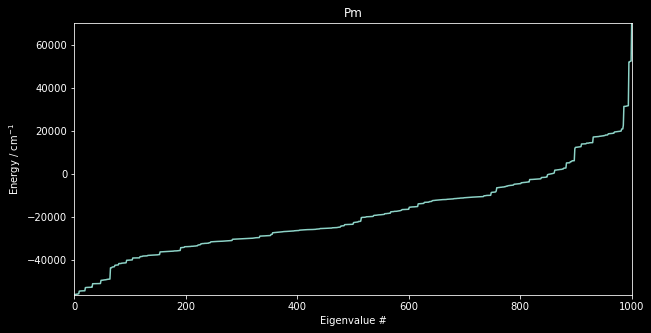

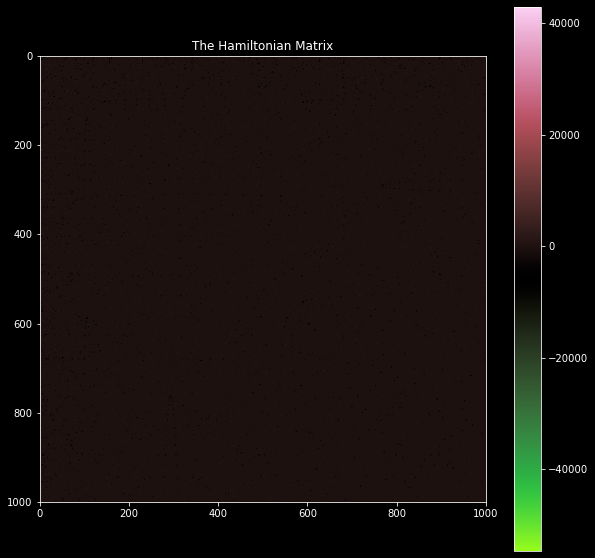

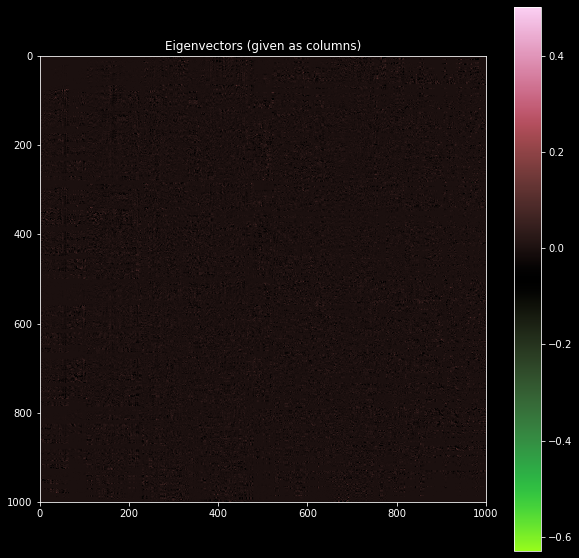

In [169]:
energies = la.lanthanide(numE, F2=76400, F4=54900.0, F6=37700.0, zeta=1025.0, 
              alpha=20.5, beta=-560, gamma=1475.0,
              T2=300.0, T3=35.0, T4=58.0, T5=-310.0, T7=350.0, T8=320.0,
              Bkq=Bkq
              )
plt.figure(figsize=(10, 5))
plt.plot(energies)
plt.xlabel('Eigenvalue #')
plt.ylabel('Energy / cm$^{-1}$')
plt.xlim(0, len(energies))
plt.ylim(min(energies), max(energies))
plt.title(ln)
plt.show()
the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)

plt.figure(figsize=(10,10))
plt.imshow(the_hamiltonian_matrix, cmap=cm.watermelon)
plt.colorbar()
plt.title('The Hamiltonian Matrix')
plt.show()

the_eigenvectors= la.load_gz_matrix('./f%d/eigenfunctions.gz' % numE, assume_real=True).T
plt.figure(figsize=(10,10))
plt.imshow(the_eigenvectors, cmap=cm.watermelon)
plt.colorbar()
plt.title('Eigenvectors (given as columns)')
plt.show()